In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to Digital Forensics - Assignment 2

Contributors (Project group 2):
- Carlos de Bourbon de Parme
- Vera Schockemöhle
- Floor Schutrups
- Jelle Hulter
- Nora Yigit
- Arda Öz

# 1. Introduction/Motivation

During this assignment, we will take a deeper look into the packet traffic of a Denial of Service attack. We would like to know how big such a attack is, how many packets would be sent in such a attack and how many different attacking systems are used in the attack.

# 2. Methodology

Answers of the questions are organized such that each subsection of the methodology section is answer to a question with the same number.

Before we start our investigation, we need to process the `.pcap` we were provided. To do this, we used `tshark`:

```bash
# This operation is extremely timing consuming. At least you only need to do it at ONCE!
!tshark -n -r 'input.pcap' -E separator=\;  -E header=y -T fields \
-e frame.time_epoch \
-e ip.proto \
-e ip.src \
-e ip.dst \
-e udp.srcport \
-e udp.dstport \
-e tcp.srcport \
-e tcp.dstport \
-e frame.len \
-e dns.qry.type \
-e dns.qry.name \
-e dns.resp.name \
-e eth.src_resolved > output.csv
```

We begin our investigation by exporting the wireshark trace as a csv and importing it using pandas:

In [2]:
df = pd.read_csv("trace-4.csv", delimiter=';')
df

,frame.time_epoch,ip.proto,ip.src,ip.dst,udp.srcport,udp.dstport,tcp.srcport,tcp.dstport,frame.len,dns.qry.type,dns.qry.name,dns.resp.name,eth.src_resolved
0,1.419263e+09,1,162.8.125.17,172.31.28.132,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,06:90:f4:0e:e0:ff
1,1.419263e+09,1,172.31.28.132,162.8.125.17,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,06:9a:6c:66:90:33
2,1.419263e+09,17,172.31.28.132,172.31.0.2,51139.0,53.0,NaN,NaN,103,1.0,ip-172-31-28-132.us-west-2.compute.internal,NaN,06:9a:6c:66:90:33
3,1.419263e+09,17,172.31.28.132,172.31.0.2,51139.0,53.0,NaN,NaN,103,28.0,ip-172-31-28-132.us-west-2.compute.internal,NaN,06:9a:6c:66:90:33
4,1.419263e+09,17,172.31.0.2,172.31.28.132,53.0,51139.0,NaN,NaN,164,28.0,ip-172-31-28-132.us-west-2.compute.internal,us-west-2.compute.internal,06:90:f4:0e:e0:ff
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122228,1.419263e+09,17,122.154.73.42,172.31.28.132,53.0,80.0,NaN,NaN,3053,255.0,nlhosting.nl,"nlhosting.nl,nlhosting.nl,nlhosting.nl,nlhosti...",06:90:f4:0e:e0:ff
122229,1.419263e+09,17,121.32.89.198,172.31.28.132,53.0,80.0,NaN,NaN,2496,255.0,sandia.gov,"sandia.gov,sandia.gov,sandia.gov,sandia.gov,sa...",06:90:f4:0e:e0:ff
122230,1.419263e+09,17,89.228.8.86,172.31.28.132,53.0,80.0,NaN,NaN,225,255.0,ietf.org,"ietf.org,ietf.org,ietf.org,ietf.org,ietf.org,i...",06:90:f4:0e:e0:ff
122231,1.419263e+09,17,113.161.106.4,172.31.28.132,53.0,80.0,NaN,NaN,638,255.0,verisign.com,"verisign.com,verisign.com,verisign.com",06:90:f4:0e:e0:ff


Next, we wanted to process the `frame.time_epoch` column by resetting the initial time to 0:

In [3]:
df['frame.time_epoch'] -= df['frame.time_epoch'][0]
df

,frame.time_epoch,ip.proto,ip.src,ip.dst,udp.srcport,udp.dstport,tcp.srcport,tcp.dstport,frame.len,dns.qry.type,dns.qry.name,dns.resp.name,eth.src_resolved
0,0.000000,1,162.8.125.17,172.31.28.132,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,06:90:f4:0e:e0:ff
1,0.000037,1,172.31.28.132,162.8.125.17,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,06:9a:6c:66:90:33
2,0.122451,17,172.31.28.132,172.31.0.2,51139.0,53.0,NaN,NaN,103,1.0,ip-172-31-28-132.us-west-2.compute.internal,NaN,06:9a:6c:66:90:33
3,0.122477,17,172.31.28.132,172.31.0.2,51139.0,53.0,NaN,NaN,103,28.0,ip-172-31-28-132.us-west-2.compute.internal,NaN,06:9a:6c:66:90:33
4,0.122684,17,172.31.0.2,172.31.28.132,53.0,51139.0,NaN,NaN,164,28.0,ip-172-31-28-132.us-west-2.compute.internal,us-west-2.compute.internal,06:90:f4:0e:e0:ff
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122228,25.342655,17,122.154.73.42,172.31.28.132,53.0,80.0,NaN,NaN,3053,255.0,nlhosting.nl,"nlhosting.nl,nlhosting.nl,nlhosting.nl,nlhosti...",06:90:f4:0e:e0:ff
122229,25.342809,17,121.32.89.198,172.31.28.132,53.0,80.0,NaN,NaN,2496,255.0,sandia.gov,"sandia.gov,sandia.gov,sandia.gov,sandia.gov,sa...",06:90:f4:0e:e0:ff
122230,25.342933,17,89.228.8.86,172.31.28.132,53.0,80.0,NaN,NaN,225,255.0,ietf.org,"ietf.org,ietf.org,ietf.org,ietf.org,ietf.org,i...",06:90:f4:0e:e0:ff
122231,25.342940,17,113.161.106.4,172.31.28.132,53.0,80.0,NaN,NaN,638,255.0,verisign.com,"verisign.com,verisign.com,verisign.com",06:90:f4:0e:e0:ff


## 2.1 - Number of Records

Looking at the number of rows in our dataframe, we see that the number of records in the entire trace is 122,233.

## 2.2 - Duration of the Trace

We see that the time point of the first record is 0.0 and the last one is 25.3, therefore the duration is 25.3 seconds.

In [4]:
df.iloc[[0,-1]]

,frame.time_epoch,ip.proto,ip.src,ip.dst,udp.srcport,udp.dstport,tcp.srcport,tcp.dstport,frame.len,dns.qry.type,dns.qry.name,dns.resp.name,eth.src_resolved
0,0.000000,1,162.8.125.17,172.31.28.132,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,06:90:f4:0e:e0:ff
122232,25.343013,17,178.21.237.130,172.31.28.132,53.0,80.0,NaN,NaN,532,255.0,isc.org,"isc.org,isc.org,isc.org,isc.org,isc.org,isc.or...",06:90:f4:0e:e0:ff


## 2.3 - 3 Packets Which are not Part of the Attack
![3 ICMP packets](figs/q3.png)

These packets are not part of the attack, since it is ICMP traffic. ICMP stands for Internet Control Message Protocol and is for example used in pinging if a certain server is available. The destination address for these packets are also different then the ones which belong to the attack.

## 2.4 - Characterisitcs of the Attack
At 2.6, we filter the dataset to the target IP address. Here can see that all traffic is DNS related, hence the attack is a Distributed Denial of Service attack using amplification through a DNS server.

## 2.5 - Wireshark Filter
![Screenshot of Wireshark filter](figs/wireshark_filter.png)

`ip.dst == 172.31.28.132`, which filters all packets on destination address of the victim.

## 2.6 - Target

Looking at the number of times each ip address appears in the "Destination" column, we observe that the target is the ip address "172.31.28.132":

In [5]:
df['ip.dst'].value_counts()[:5]

172.31.28.132                  120253
172.31.0.2                        100
92.103.90.30,172.31.28.132         26
122.154.73.42,172.31.28.132        26
61.7.231.225,172.31.28.132         26
Name: ip.dst, dtype: int64

We use the dataframe of the attack from now on for answering the questions:

In [6]:
attack_df = df[(df['ip.dst'].apply(lambda x: "172.31.28.132" in x))]
attack_df

,frame.time_epoch,ip.proto,ip.src,ip.dst,udp.srcport,udp.dstport,tcp.srcport,tcp.dstport,frame.len,dns.qry.type,dns.qry.name,dns.resp.name,eth.src_resolved
0,0.000000,1,162.8.125.17,172.31.28.132,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,06:90:f4:0e:e0:ff
4,0.122684,17,172.31.0.2,172.31.28.132,53.0,51139.0,NaN,NaN,164,28.0,ip-172-31-28-132.us-west-2.compute.internal,us-west-2.compute.internal,06:90:f4:0e:e0:ff
5,0.122704,17,172.31.0.2,172.31.28.132,53.0,51139.0,NaN,NaN,119,1.0,ip-172-31-28-132.us-west-2.compute.internal,ip-172-31-28-132.us-west-2.compute.internal,06:90:f4:0e:e0:ff
8,0.131178,17,172.31.0.2,172.31.28.132,53.0,51985.0,NaN,NaN,119,1.0,ip-172-31-28-132.us-west-2.compute.internal,ip-172-31-28-132.us-west-2.compute.internal,06:90:f4:0e:e0:ff
9,0.131193,17,172.31.0.2,172.31.28.132,53.0,51985.0,NaN,NaN,164,28.0,ip-172-31-28-132.us-west-2.compute.internal,us-west-2.compute.internal,06:90:f4:0e:e0:ff
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122228,25.342655,17,122.154.73.42,172.31.28.132,53.0,80.0,NaN,NaN,3053,255.0,nlhosting.nl,"nlhosting.nl,nlhosting.nl,nlhosting.nl,nlhosti...",06:90:f4:0e:e0:ff
122229,25.342809,17,121.32.89.198,172.31.28.132,53.0,80.0,NaN,NaN,2496,255.0,sandia.gov,"sandia.gov,sandia.gov,sandia.gov,sandia.gov,sa...",06:90:f4:0e:e0:ff
122230,25.342933,17,89.228.8.86,172.31.28.132,53.0,80.0,NaN,NaN,225,255.0,ietf.org,"ietf.org,ietf.org,ietf.org,ietf.org,ietf.org,i...",06:90:f4:0e:e0:ff
122231,25.342940,17,113.161.106.4,172.31.28.132,53.0,80.0,NaN,NaN,638,255.0,verisign.com,"verisign.com,verisign.com,verisign.com",06:90:f4:0e:e0:ff


## 2.7 - Number of Records in the Attack

Looking at the numbers above, we observed that there were 120,253 records belonging to the attack.

## 2.8 - Unique IPs in the Attack

When we selected the records with "192.168.1.183" as the target and looked at the Source IPs, we observed that there are 83 unique IP addresses performing the attack.

In [7]:
attack_df['ip.src'] = attack_df['ip.src'].apply(lambda x: x.split(',')[-1]) #Remove entries with 2 source IP's, always take the latter one
print("Unique IPs performing the attack: %d" % len(attack_df['ip.src'].unique()))
print(attack_df['ip.src'].unique())

Unique IPs performing the attack: 83
['162.8.125.17' '172.31.0.2' '162.8.125.20' '89.228.8.86' '70.62.123.36'
 '82.145.62.6' '82.145.62.5' '37.123.96.179' '92.103.90.30' '82.80.26.175'
 '192.117.105.121' '61.93.9.158' '81.5.178.235' '198.101.213.159'
 '218.216.183.36' '62.219.152.108' '109.2.223.27' '81.218.145.44'
 '61.7.231.225' '122.154.73.42' '42.112.208.60' '61.19.78.113'
 '122.154.238.10' '81.218.188.83' '121.32.89.198' '59.154.53.77'
 '203.174.167.20' '82.145.62.7' '82.145.62.3' '211.138.248.108'
 '110.170.116.9' '81.7.86.91' '110.170.116.12' '60.250.159.61'
 '109.184.1.96' '217.15.140.158' '200.107.235.46' '113.161.106.4'
 '62.219.141.161' '61.152.126.84' '202.10.92.5' '180.180.126.177'
 '109.161.52.1' '217.118.186.54' '189.90.244.42' '80.51.214.183'
 '85.93.44.161' '88.85.171.248' '110.159.221.147' '59.46.49.50'
 '63.246.239.2' '61.152.126.82' '113.161.106.6' '46.145.104.93'
 '195.175.90.210' '110.77.140.17' '177.69.215.97' '118.70.197.18'
 '175.138.61.51' '118.70.197.32' '113

/tmp/ipykernel_19035/3839143380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_df['ip.src'] = attack_df['ip.src'].apply(lambda x: x.split(',')[-1]) #Remove entries with 2 source IP's, always take the latter one


## 2.9 - Top 3 Sources

When we count the number of packages belonging to each source, we see the following list. The top 3 ip addresses are "37.123.96.179", "61.93.9.158" and "121.32.89.198".

In [8]:
topThree = attack_df['ip.src'].value_counts().head(3)
topThree

37.123.96.179    11152
61.93.9.158       8112
121.32.89.198     6286
Name: ip.src, dtype: int64

## 2.10 and 2.11 Geolocation and Autonomous System of Top 3 Sources

For geolocating the ip addresses, we used the [WhatIsMyIp.com](https://www.whatismyip.com/ip-address-lookup/) website. We found the results in the following table:

| IP | Autonomous System | City | State/Region | Country Code | Postal Code | ISP | Time Zone |
| -  | -   | -    | -            | -            | -           | -   | -         |
| 37.123.96.179 | AS57844 | Manisa | Manisa | Turkey | 45000 | SPDNet Telekomunikasyon Hizmetleri Bilgi Teknolojileri Taahhut Sanayi Ve Ticaret A.S. | +03:00 |
| 61.93.9.158 | AS9269 | Honk Kong | Honk Kong | Honk Kong | - | HKBN - Corporate User | +08:00 |
| 121.32.89.198 | AS4134 | Guangzhou | Guangdong | China | 510140 |  ChinaNet Guangdong Province Network | +08:00 |


## 2.12 Vendors related to the Top 3 Sources

In [9]:
topThreeMAC = pd.DataFrame(data=[],columns=['ip', 'ethernet'])

for ip in topThree.keys():
    singleRecord = attack_df[attack_df['ip.src'] == ip].head(1)
    record = {'ip': ip, 'ethernet': singleRecord['eth.src_resolved'].tolist()[0]}
    topThreeMAC = topThreeMAC.append(record, ignore_index=True)
    
topThreeMAC

,ip,ethernet
0,37.123.96.179,06:90:f4:0e:e0:ff
1,61.93.9.158,06:90:f4:0e:e0:ff
2,121.32.89.198,06:90:f4:0e:e0:ff


Hence, we can see that all ethernet source addresses are `06:90:f4:0e:e0:ff`. After doing a [MAC address to vendor lookup](https://macvendors.com/), we noticed that it did not correspond to a certain block of MAC addresses.

## 2.13 - Source Ports

UDP ports used in the attack are 53 and 1988:

In [10]:
attack_df['udp.srcport'].value_counts()

53.0      122126
1988.0         2
Name: udp.srcport, dtype: int64

Only TCP port used in the attack is 80:

In [11]:
attack_df['tcp.srcport'].value_counts()

80.0    1
Name: tcp.srcport, dtype: int64

## 2.14 - Data Rate Peak

To calculate the data rate over time, we can use the "Time" column of our dataset. We can use [the moving average](https://en.wikipedia.org/wiki/Moving_average) approach. Basically we will have a window of time and we will calculate the data rate within the window and we will keep sliding this window until we reach the end of the attack. You can see the plot down below:

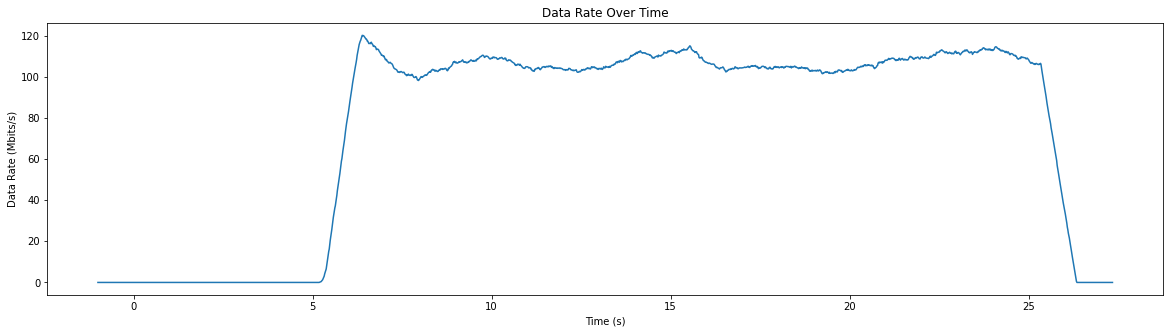

Highest rate: 120.0975


In [12]:
n_steps = 2000  # resolution
padding = 1     # number of seconds to show in the plot before and after the attack 

cur_time = - padding
final_time = attack_df.iloc[122130]['frame.time_epoch'] + 1 + padding
window_size = (final_time - cur_time)/n_steps

time_steps   = []
rates        = []
highest_rate = -1

while cur_time < final_time:
    window_df = attack_df[(cur_time - 1 <= attack_df['frame.time_epoch']) & (attack_df['frame.time_epoch'] <= cur_time)]
    rate      = window_df['frame.len'].sum() / 1e6 * 8

    time_steps.append(cur_time)
    rates.append(rate)

    if rate > highest_rate:
        highest_rate = rate

    cur_time += window_size

# Plotting
plt.figure(figsize=(20, 5))
plt.plot(time_steps, rates)
plt.title("Data Rate Over Time")
plt.ylabel("Data Rate (Mbits/s)")
plt.xlabel("Time (s)")
plt.show()

print("Highest rate: %.4f" % highest_rate)

We concluded that the highest Mbit rate was 120.0975

## 2.15 - TCP Flags

We only found one package using TCP:

In [13]:
attack_df['tcp.srcport'].value_counts()

80.0    1
Name: tcp.srcport, dtype: int64

Content of the flag can be seen below:

![TCP contect](figs/tcp-flags.jfif)

## 2.16 - Packet Lenght Distribution

When we plot a pie chart to see the distribution of the packet lengths in the attack, we observed that all the packages in the attack have the same size, 74.

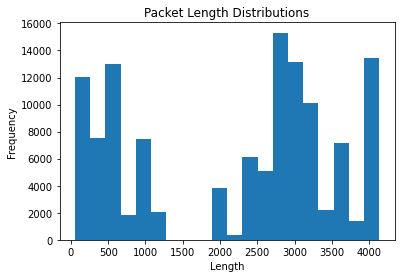

In [14]:
plt.title("Packet Length Distributions")
plt.xlabel("Length")
attack_df['frame.len'].plot.hist(bins=20)
plt.show()

# 3. Conclusion
Using the exercises we have gotten a better look at what is happening exactly during a Denial of Service attack. We will now answer the questions we had at the start of the assignment.

## How big is this Denial of Service attack?
To answer this question, we can quickly sum all frame lengths from our DataFrame. Since all frame lengths are represented in bytes, we multiple it by 10<sup>-9</sup> in order to get the amount in gigabytes.

In [17]:
attack_df['frame.len'].sum() * (10 ** -9)

0.268907924

## How many packets are sent in this Denial of Service attack?
This answer can be answered easily by using question 2.13, which counted a total of 122126 which were sent from port 53, hence was DNS traffic.

## How many systems were used in this Denial of Service attack?
We can use question 2.8 for this, because we see a total of 83 unique source addresses. This means that there were 83 IPs from which DNS respones were sent to the victim device.